# GHP Construction with duration Matching

In [41]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def bonds_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):
    """
    Returns a series of cash flow generated by a bond, 
    indexed by a coupon number
    """
    n_coupons = round(maturity*coupons_per_year)
    coupon_amt = principal*coupon_rate/coupons_per_year
    coupon_times = np.arange(1,n_coupons+1)
    cash_flows = pd.Series(data=coupon_amt, index = coupon_times)
    cash_flows.iloc[-1] += principal
    return cash_flows

def bonds_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Price a bond based on parameters maturity, principal, coupon rate and coupons_per_year
    and the prevailing discount rate
    """
    cash_flows = bonds_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
    return erk.pv(cash_flows, discount_rate/coupons_per_year)

In [28]:
bonds_price(3,100,0.03,2)

100.00000000000006

In [29]:
erk.bonds_cash_flows(3,100,0.03,2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [32]:
erk.bonds_price(20,1000,0.05,2, .04)

1136.7773962036904

In [35]:
erk.bonds_price(20,1000,0.05,2, .06)

884.42614012896706

In [34]:
erk.bonds_price(20,1000,0.05,2, .05)

1000.0000000000023

In [44]:
rates = np.linspace(.01, .10, num=50)
rates

array([ 0.01      ,  0.01183673,  0.01367347,  0.0155102 ,  0.01734694,
        0.01918367,  0.02102041,  0.02285714,  0.02469388,  0.02653061,
        0.02836735,  0.03020408,  0.03204082,  0.03387755,  0.03571429,
        0.03755102,  0.03938776,  0.04122449,  0.04306122,  0.04489796,
        0.04673469,  0.04857143,  0.05040816,  0.0522449 ,  0.05408163,
        0.05591837,  0.0577551 ,  0.05959184,  0.06142857,  0.06326531,
        0.06510204,  0.06693878,  0.06877551,  0.07061224,  0.07244898,
        0.07428571,  0.07612245,  0.07795918,  0.07979592,  0.08163265,
        0.08346939,  0.08530612,  0.08714286,  0.08897959,  0.09081633,
        0.09265306,  0.0944898 ,  0.09632653,  0.09816327,  0.1       ])

In [45]:
prices = [erk.bonds_price(50,1000,.05,2,rate) for rate in rates]
prices

[2570.8528953155746,
 2437.0751893193101,
 2312.590520945655,
 2196.6792161621825,
 2088.6805717550369,
 1987.9878496216227,
 1894.0437067235605,
 1806.3360220420554,
 1724.3940853639945,
 1647.7851158937797,
 1576.1110815629979,
 1509.0057925258791,
 1446.1322447055059,
 1387.1801914161074,
 1331.8639230519921,
 1279.9202366195334,
 1231.1065785135413,
 1185.1993454163735,
 1141.9923295425428,
 1101.2952956741926,
 1062.9326785450746,
 1026.7423901433122,
 992.57472742458697,
 960.2913717658148,
 929.76447225319032,
 900.87580559339358,
 873.51600606998511,
 847.58385954326627,
 822.98565601722419,
 799.63459577553476,
 777.45024452429448,
 756.35803337655602,
 736.28879987554774,
 717.17836658356134,
 698.96715406411568,
 681.59982535939287,
 665.02495931504927,
 649.19475033246658,
 634.06473233671886,
 619.59352493833194,
 605.74259994001977,
 592.47606649776469,
 579.76047338985506,
 567.56462697912718,
 555.85942357400768,
 544.61769500367484,
 533.81406632303037,
 523.4248246546

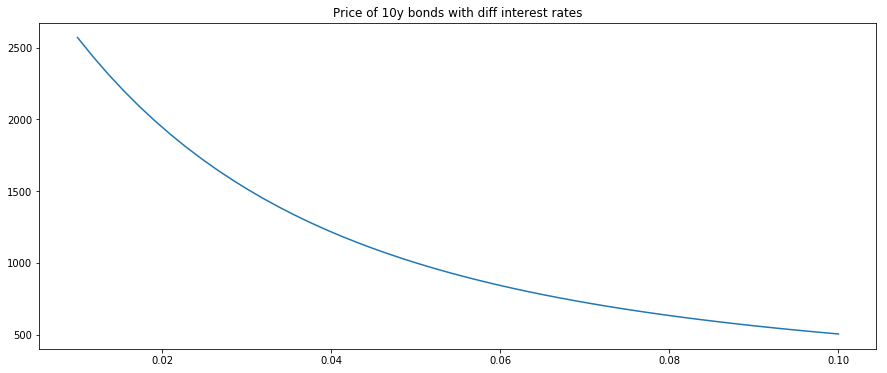

In [47]:
pd.DataFrame(data = prices, index = rates).plot(title = "Price of 10y bonds with diff interest rates", legend = False, figsize=(15,6))

In [50]:
cf = erk.bonds_cash_flows(3,1000,.06,2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [53]:
# duration or weighted average time 
discounts = erk.discount(cf.index, 0.06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [54]:
dcf = discounts*cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [55]:
weights = dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [57]:
sum(cf.index*weights)

5.579707187194534

In [59]:
(cf.index*weights).sum() # Macaulay duration dP/dr 

5.5797071871945336

In [42]:
erk.macaulay_duration(erk.bonds_cash_flows(3,1000,.06,2), .06/2)

5.579707187194534

## Duration Matching

Here we are talking about Macaulay duration 

In [62]:
liabilities = pd.Series(data=[100000,100000], index=[10,12])
erk.macaulay_duration(liabilities, .04)

10.960799385088393

In [63]:
md_10 = erk.macaulay_duration(erk.bonds_cash_flows(10,1000,.05,1), .04)
md_20 = erk.macaulay_duration(erk.bonds_cash_flows(20,1000,.05,1), .04)
md_10, md_20

(8.1908988240832326, 13.544718122145921)

In our case, the fraction in the short duration asset $w_s$ should be such that:

$$ w_s \times 8.19 + (1-w_s) \times 13.54 = 10.96 $$

more generally:

$$ w_s \times d_s + (1-w_s) \times d_l = 10.96 $$

rearranging gives:

$$ w_s = \frac{d_l - d_t}{d_l - d_s} $$

In [67]:
short_bonds = erk.bonds_cash_flows(10,1000,.05,1)
long_bonds = erk.bonds_cash_flows(20,1000,.05,1)
w_s = erk.match_durations(liabilities, short_bonds, long_bonds, .04)
w_s

0.48263092069478974

In [69]:
p_short = erk.bonds_price(10,1000,.05,1,.04)
p_long = erk.bonds_price(20,1000,.05,1,.04)
a_0 = 130000
ptf_flows = pd.concat([a_0*w_s*short_bonds/p_short,a_0*(1-w_s)*long_bonds/p_long])
erk.macaulay_duration(ptf_flows, .04)

10.960799385088393

In [70]:
erk.macaulay_duration(liabilities, .04)

10.960799385088393

In [72]:
cfr = erk.funding_ratio(ptf_flows, liabilities, .04)
cfr

0.9998760012192478

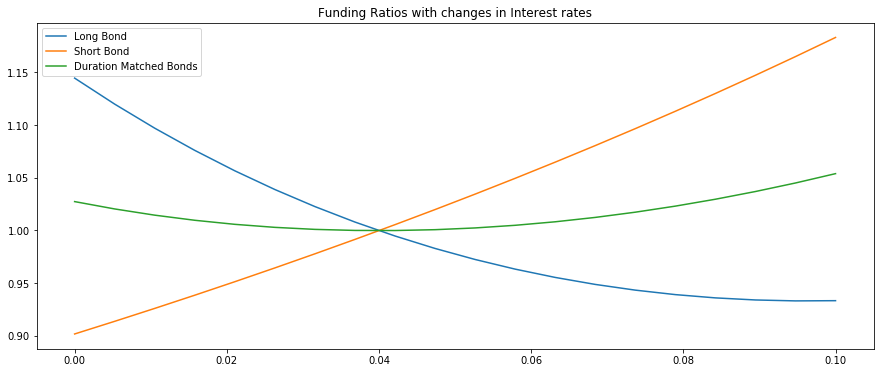

In [74]:
rates = np.linspace(0,.1,20)
lb_assets = a_0*long_bonds/p_long
sb_assets = a_0*short_bonds/p_short

fr_change = pd.DataFrame({
    "Long Bond":[erk.funding_ratio(lb_assets, liabilities, r) for r in rates],
    "Short Bond":[erk.funding_ratio(sb_assets, liabilities, r) for r in rates], 
    "Duration Matched Bonds":[erk.funding_ratio(ptf_flows, liabilities, r) for r in rates]
}, index=rates)

fr_change.plot(title="Funding Ratios with changes in Interest rates", figsize=(15,6))